In [1]:
print('Srinivasu Narahari')
print('Week6 Capstone Project')
print('ALY6140 72241 Analytics Systems Technology SEC 11 Fall 2019 CPS')

In [ ]:
# Website Data Downloaded https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3
#. Data are being released that show significant variation across the country and within communities in what providers charge for common services. 
#. These data include information comparing the charges for the 100 most common inpatient services and 30 common outpatient services. 
#. Providers determine what they will charge for items and services provided to patients and these charges are the amount the providers bills for an item or service.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show,output_notebook

#.Removed spaces in the column headers of the  data. Data downloaded from the CMS is clean. 
#.Removed spaces before and after header column.
#.No null or empty cells in the data.
##Data Fields in the Data
#. DRGDefinition : Type of service provided by providers.
#. ProviderId    : Unique Id of the Provider in the country.
#. ProviderName  : Provider name
#. ProviderStreetAddress : Provider address
#. ProviderCity  : City of the provider 
#. PoviderState  : Stated in which provider providing service.
#. ProviderZipCode : Provider Zip code.
#. HospitalReferralRegionDescription : Hospital located region.
#. TotalDischarges: Total services provided by Provider.
#.AverageCoveredCharges : charges for total services provided by the provider. 
#.AverageTotalPayments  : Total payments from the CMS
#.AverageMedicarePayments : Total medicare payments from the CMS.

In [10]:
df = pd.read_csv('C:/naraharitransactions/AddmissionsInfo/ALY6140 72241 Analytics Systems Technology SEC 11 Fall 2019 CPS/Week6_Capstone/Data.csv')
df = df.rename(columns={"DRG Definition": "DRGDefinition", "Provider Id" : "ProviderId" ,"Provider Name": "ProviderName","Provider Street Address": "ProviderStreetAddress", "Provider City" : "ProviderCity" ,"Provider State": "ProviderState", "Provider Zip Code" : "ProviderZipCode","Hospital Referral Region Description": "HospitalReferralRegionDescription","Total Discharges": "TotalDischarges","Average Covered Charges" : "AverageCoveredCharges","Average Total Payments": "AverageTotalPayments","Average Medicare Payments": "AverageMedicarePayments"})
df = df.rename(columns={"Total Discharges": "TotalDischarges","Average Covered Charges" : "AverageCoveredCharges","Average Total Payments": "AverageTotalPayments"})
df.tail(5)

,DRGDefinition,ProviderId,ProviderName,ProviderStreetAddress,ProviderCity,ProviderState,ProviderZipCode,HospitalReferralRegionDescription,TotalDischarges,AverageCoveredCharges,AverageTotalPayments,AverageMedicarePayments
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54
163064,948 - SIGNS & SYMPTOMS W/O MCC,670068,TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND,4400 LONG PRAIRIE ROAD,FLOWER MOUND,TX,75028,TX - Dallas,12,15042.00,3539.75,2887.41


In [ ]:
##Questions you intend to answer with the dataset
#Find the top 10 drug codes paying more  AverageMedicarePayments.
#Find TOP 20 AverageMedicarePayments for the providers in all States.
#Find top 20 provider list paying more average medicare payments.
#List of top 20 providers in Boston paying ,more  AverageMedicarePayments.
#Show the total medicare payments distribution and probabilty density ?
#


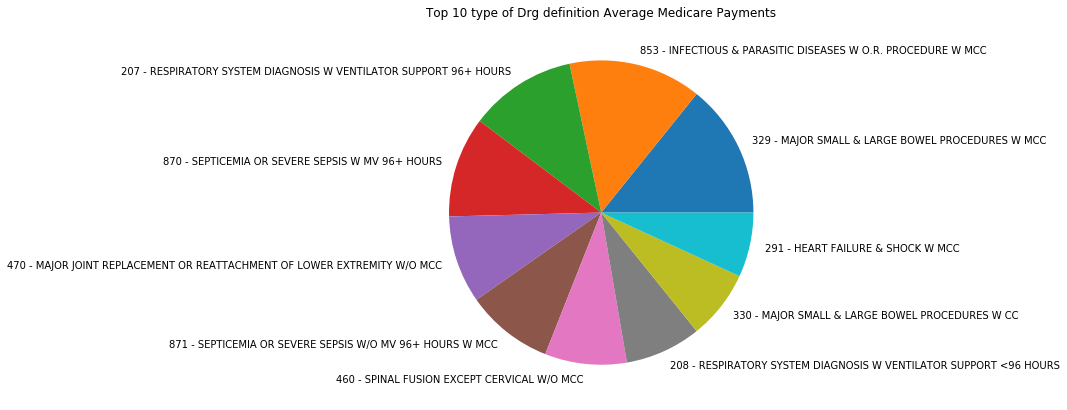

In [4]:
#Find the top 10 drug codes paying more  AverageMedicarePayments.
df1 = df.groupby('DRGDefinition').sum()
df2 = df1.sort_values('AverageMedicarePayments',ascending = False)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.pie(x= df2['AverageMedicarePayments'].head(10),labels = df2.head(10).index)
plt.title("Top 10 type of Drg definition Average Medicare Payments")
plt.show()


<Figure size 432x288 with 0 Axes>

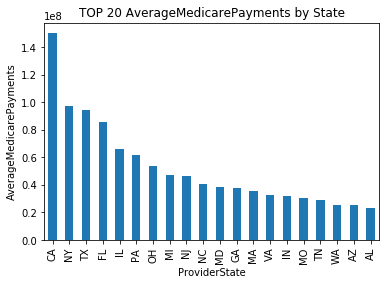

In [5]:
#Find TOP 20 AverageMedicarePayments for the providers in all States.
df3 = df.groupby('ProviderState').AverageMedicarePayments.sum()
df3.head(5)
df4 = df3.sort_values('index', ascending=False)
figline1=plt.figure()
figbar =plt.figure()
ax1 = figbar.add_subplot(1,1,1)
ax1.set_xlabel('ProviderState')
ax1.set_ylabel('AverageMedicarePayments')
ax1.set_title("TOP 20 AverageMedicarePayments by State")
df4.head(20).plot(kind='bar')



C:\Users\narah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


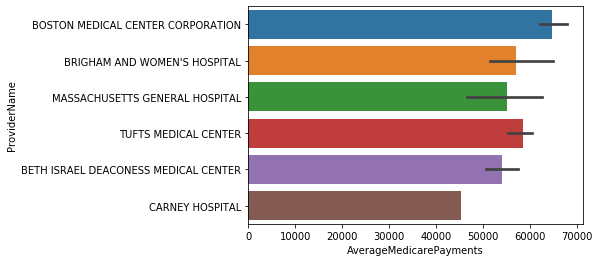

In [6]:
#List of top 20 providers in Boston paying ,more  AverageMedicarePayments.
import seaborn as sns
ma =    df['ProviderState']=='MA'
df5 = df[ma]
boston = df['ProviderCity']=='BOSTON' 
df5 = df5[boston]
df6 = df5.sort_values('AverageMedicarePayments', ascending=False)
sns.barplot(x="AverageMedicarePayments", y='ProviderName', data = df6.head(20))

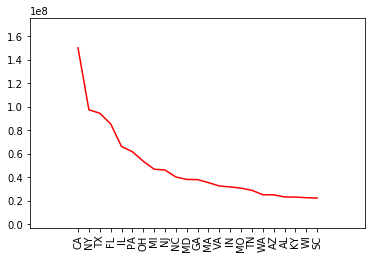

In [7]:
df6 = df.groupby('ProviderState').sum()
df7= df6.sort_values('AverageMedicarePayments', ascending=False).head(23)
x = df7.index
y = df7['AverageMedicarePayments']
plt.plot(x, y,"r")
plt.xticks(rotation=90)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.show()


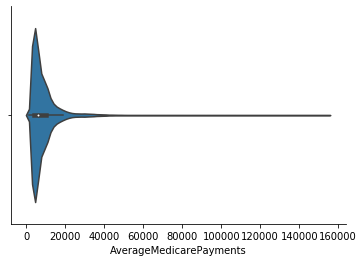

In [8]:
#Show the total medicare payments distribution and probabilty density ?
import seaborn as sns 
sns.violinplot(df['AverageMedicarePayments'])
sns.despine()

# <b>Predictions Section</b>



In [15]:
#Build a model by using linear regression.We can predict AverageMedicarePayments.We are  building a linear relation between 
#AverageMedicarePayments  by using RGDefinition,TotalDischarges,ProviderState,AverageCoveredCharges,AverageTotalPayments.
#Used  sklearn linear regresdsion method for building the model
import sklearn
from sklearn import linear_model
from patsy import dmatrices

y,X = dmatrices('AverageMedicarePayments ~ DRGDefinition + TotalDischarges + ProviderState + AverageCoveredCharges +AverageTotalPayments', data = df)
print("y:{}".format(y.shape))
print("X:{}".format(X.shape))
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)

y:(163065, 1)
X:(163065, 153)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

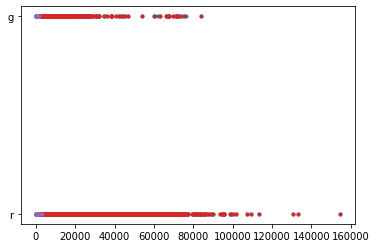

In [77]:
plt.plot(X, y, '.','r')
plt.plot(X, model.predict(X), '.','g')


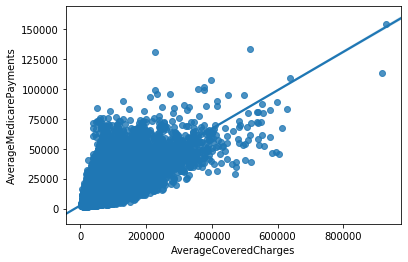

In [85]:
## Find Linear relation between AverageMedicarePayments and AverageCoveredCharges.
sns.regplot(y="AverageMedicarePayments", x="AverageCoveredCharges", data=df)

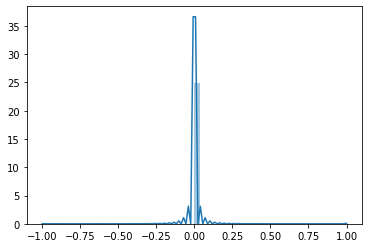

In [78]:
sns.distplot(y.ravel() - model.predict(X))

In [17]:
from sklearn.model_selection import cross_val_score
scoring = 'r2'
print(cross_val_score(model, X, y, cv=3, scoring=scoring))

[-4.62808978e+11  9.71937156e-01  9.71068317e-01]


C:\Users\narah\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\narah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


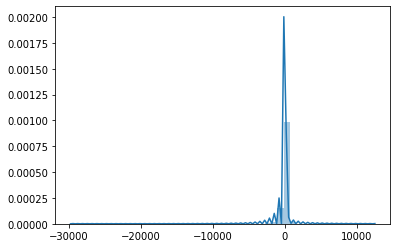

In [23]:
from sklearn import ensemble
modelRandom = sklearn.ensemble.RandomForestRegressor()
modelRandom.fit(X,y)
sns.distplot(y.ravel() - modelRandom.predict(X))

In [24]:
scoring = 'r2'
print(cross_val_score(modelRandom, X, y, cv=3, scoring=scoring))

C:\Users\narah\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\narah\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\narah\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.96516154 0.98027431 0.97930269]


In [ ]:
##Comarison Report
Following are coefficients for  model build by using Linear regression methios.
#4.62808978e+11  9.71937156e-01  9.71068317e-01]

Following are coefficients for  model build by using RandomForestRegressor method..
#0.96516154 0.98027431 0.97930269]

#we can see that randomForestRegressor better then  Linear Regression method..

[0. 0. 0. ... 0. 0. 0.]


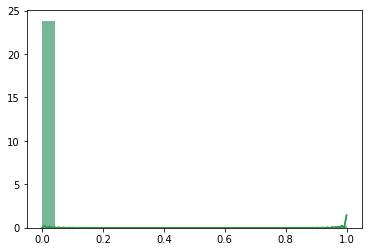

In [71]:
##building a model where AverageTotalPayments is more than AverageCoveredCharges.
#To build this model we are using LogisticRegression and RandomForestClassifier.
df['MemberPayments'] = (df['AverageTotalPayments'] /df['AverageCoveredCharges']> 1).astype(np.float32)
y,X = dmatrices('MemberPayments ~ AverageMedicarePayments + DRGDefinition + TotalDischarges + ProviderState', data = df)
print (y[:,0])
sns.distplot(X[y[:,0]> 0, 1])
sns.distplot(X[y[:,0]< 0, 1])
sns.distplot(X[y[:,0]==1, 1])



In [72]:
y,X = dmatrices('MemberPayments ~ AverageMedicarePayments + DRGDefinition + TotalDischarges + ProviderState', data = df)
model = sklearn.linear_model.LogisticRegression()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

C:\Users\narah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\narah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    162482
         1.0       0.00      0.00      0.00       583

    accuracy                           1.00    163065
   macro avg       0.50      0.50      0.50    163065
weighted avg       0.99      1.00      0.99    163065



In [73]:
y,X = dmatrices('MemberPayments ~ AverageMedicarePayments + DRGDefinition + TotalDischarges + ProviderState', data = df)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X,y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

C:\Users\narah\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\narah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    162482
         1.0       1.00      0.77      0.87       583

    accuracy                           1.00    163065
   macro avg       1.00      0.88      0.93    163065
weighted avg       1.00      1.00      1.00    163065



In [ ]:
#By comaring lienar regression model and RandomForestClassifier with this we can oberve that RandomForestClassifier is better efficient method.